# Transcription of the best notebook

In [3]:
import os
#pylab은 matplotlib 설치시 같이 설치되는 모듈 중 하나이며 Pyplot과 numpy를 하나의 네임스페이스에 임포트시킨다.
#하지만 네임스페이스를 오염시킬 우려가 크기 때문에 앞으로 사라질 듯한 모듈이다.
import pylab
#달력을 볼 수 있는 모듈. calendar,prcal,prmonth,weekday 등 다양한 함수 존재
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
# scipy는 수치해석기능을 제공하는 패키지.
# 그중에서도 stats 서브패키지는 확률분포 분석을 위한 다양한 기능 제공
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
# chained indexing으로 인한 경고를 모두 무시하겠다.
pd.options.mode.chained_assignment = None
warnings.filterwarnings(action='ignore')

In [4]:
os.chdir('/Users/younghun/Desktop/gitrepo/data')

In [22]:
dailyData =  pd.read_csv('bike_train.csv', encoding='utf-8')
dailyData.shape

(10886, 12)

## Data summary

- 데이터 크기 살펴보기
- 데이터 몇 rows 미리보기
- 변수들의 dtype 살펴보기

In [23]:
dailyData.shape

(10886, 12)

In [24]:
dailyData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [25]:
dailyData.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## Feature Engineering

- 원본 데이터의 season, holiday, workingday, weather 변수 타입들이 int형인데 이를 EDA를 위해 Categorical로 바꾸어 주자

- datetime 칼럼으로부터 date, hour, weekday, month 추출하고 datetime 칼럼 삭제
- season, holiday, workingday, weather 칼럼 강제로 범주형변수로 바꿔주기


In [26]:
dailyData['datetime'] = pd.to_datetime(dailyData['datetime'])

In [40]:
season_dict = {1:'Spring', 2:'Sumeer',3:'Fall',4:'Winter'}
weather_dict = {1:'Clear, Few clouds, Partly cloudy, Partly cloudy',
               2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
               3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
               4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}

In [42]:
dailyData['date'] = dailyData['datetime'].dt.date
dailyData['hour'] = dailyData['datetime'].dt.hour
dailyData['weekday'] = dailyData['datetime'].dt.weekday
dailyData['month'] = dailyData['datetime'].dt.month
dailyData['season'] = dailyData.season.map(season_dict)
dailyData['weather'] = dailyData.weather.map(weather_dict)

In [44]:
# 반복되는 value들이 많으면 cateogry타입을 사용하는 것이 훨씬 더 속도가 빨라짐
# object는 반복되는 value들이 거의 없을 때 사용!

# Categorical type으로 바꿔주기
category_lst = ['hour','weekday','month','season',
               'weather','holiday','workingday']
for var in category_lst:
    dailyData[var] = dailyData[var].astype('category')

In [45]:
# datetime 칼럼 삭제해주기
del dailyData['datetime']

## Handling missing values

<AxesSubplot:>

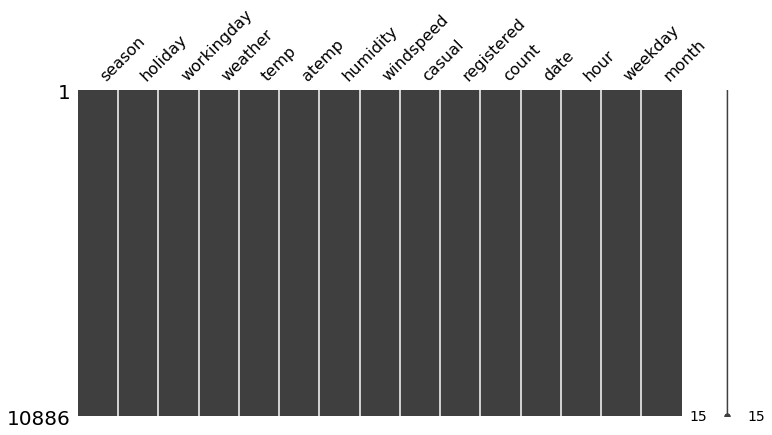

In [57]:
# missingno 를 이용해서 결측치 시각화해보기
msno.matrix(dailyData, figsize=(12,6))

## Checking outliers

In [58]:
dailyData.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [61]:
dailyData.describe(include='category')

,season,holiday,workingday,weather,hour,weekday,month
count,10886,10886,10886,10886,10886,10886,10886
unique,4,2,2,4,24,7,12
top,Winter,0,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",23,5,12
freq,2734,10575,7412,7192,456,1584,912


(array([3426., 1703., 1492., 1183.,  891.,  679.,  450.,  360.,  249.,
         161.,  120.,   68.,   61.,   36.,    7.]),
 array([  1.        ,  66.06666667, 131.13333333, 196.2       ,
        261.26666667, 326.33333333, 391.4       , 456.46666667,
        521.53333333, 586.6       , 651.66666667, 716.73333333,
        781.8       , 846.86666667, 911.93333333, 977.        ]),
 <BarContainer object of 15 artists>)

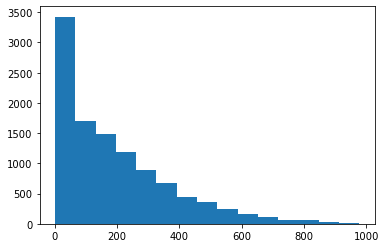

In [64]:
# y값인 count 종속변수가 매우 편향된 분포를 띄고 있다. 
# 정규분포화시켜야할 필요가 있음
plt.hist(dailyData['count'], bins=15)

<AxesSubplot:xlabel='workingday', ylabel='count'>

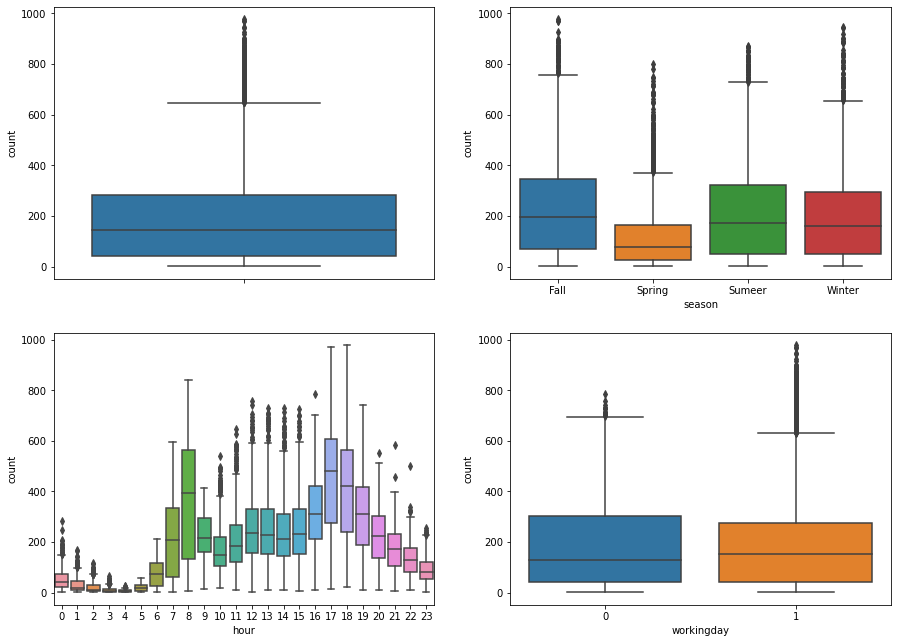

In [68]:
# boxplot으로 다른 변수들도 이상치 탐지해보기
fig, axes = plt.subplots(figsize=(15,11), nrows=2, ncols=2)
# 종속변수인 count 변수 boxplot
sns.boxplot(data=dailyData, y='count', orient='v', ax=axes[0][0])
# 계절변수 boxplot
sns.boxplot(data=dailyData, y='count', x='season', orient='v',
           ax=axes[0][1])
# 시간대 변수 boxplot
sns.boxplot(data=dailyData, y='count', x='hour', orient='v',
           ax=axes[1][0])
# 영업일 여부 변수에 따른 boxplot
sns.boxplot(data=dailyData, y='count', x='workingday', orient='v',
           ax=axes[1][1])

In [75]:
# count 종속변수에서 이상치 제거하는 함수 만들어주기
def remove_outliers(df, column):
    quartile3 = np.percentile(df[column], 75)
    quartile1 = np.percentile(df[column], 25)
    iqr = quartile3 - quartile1
    lowest = quartile1 - (1.5*iqr)
    highest = quartile3 + (1.5*iqr)
    outlier_idx = df[(df[column] < lowest)|(df[column] > highest)].index
    df = df.drop(outlier_idx, axis=0)
    return df

In [ ]:
dailyDataWithoutOutliers = remove_outliers(dailyData, 'count')

In [83]:
print("Original shape :", dailyData.shape)
print("After removing outliers, shape :", dailyDataWithoutOutliers.shape)

Original shape : (10886, 15)
After removing outliers, shape : (10586, 15)


## Correlation analysis